In [3]:
import cv2 
import PIL 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

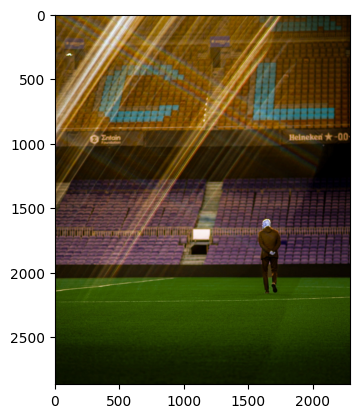

In [4]:
img = cv2.imread('image.jpg')
plt.imshow(img)
plt.show()

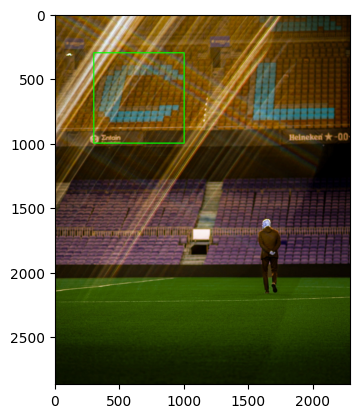

In [6]:
#creating copy for annotating image 
annoted_image = img.copy() 
# Annotating the image by creating rectangle for creating mask
cv2.rectangle(annoted_image,pt1=(300,300),pt2=(1000,1000),color=(0,255,0),thickness=8)
plt.imshow(annoted_image)
# For saving the annoted image
plt.savefig("Annoted_image.jpg")
plt.show()

## Masks 
Masks help to define the region of interest in the original image and help to extract such region from entire image. The binary mask acts as a filter, indicating which pixels in the original image should be affected by the processing operation, and which ones should be left untouched

Binary masks are commonly used in image processing for various tasks, such as image segmentation, object detection, and image filtering

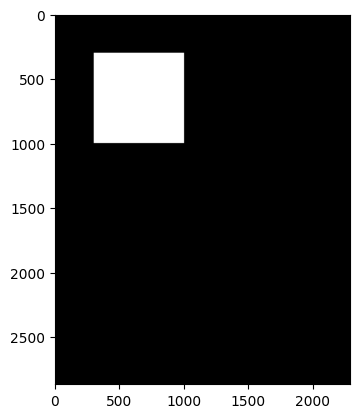

In [11]:
#creating a binary mask 
mask = np.zeros(img.shape[:2],np.uint8)
mask[300:1000,300:1000] = 255 
plt.imshow(mask,cmap="gray")
plt.savefig("mask.jpg")
plt.show()

In [9]:
min_val = 0 
max_val = 256 

In [12]:
# using mask on original image to extract roi 
masked_img = cv2.bitwise_and(img,img,mask=mask)
# histogram of original image
hist_full = cv2.calcHist([img],[min_val],None,[max_val],[min_val,max_val])
# histogram of masked image 
hist_mask = cv2.calcHist([img],[min_val],mask,[max_val],[min_val,max_val])

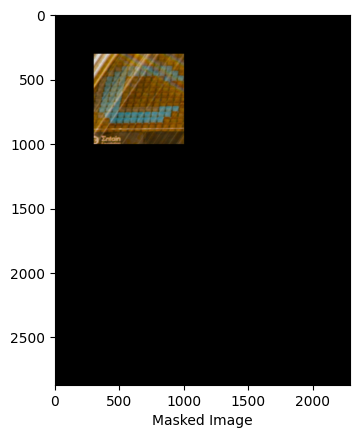

In [13]:
#showing the extracted roi 
plt.imshow(masked_img)
plt.xlabel("Masked Image")
plt.savefig("extracted_roi.jpg")
plt.show()

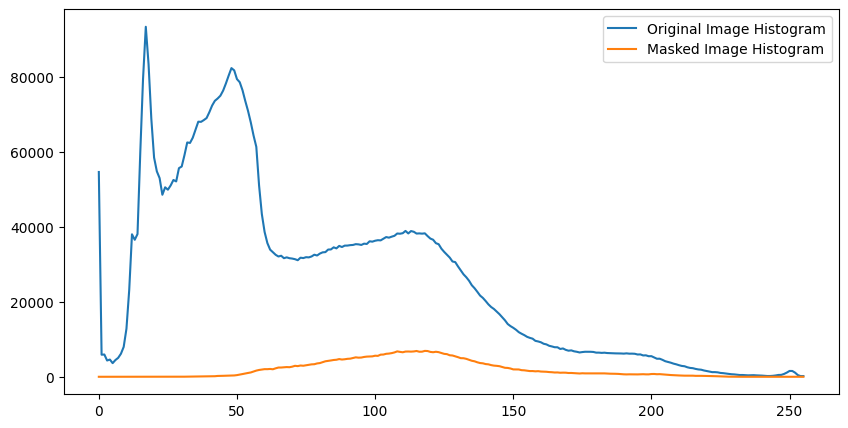

In [14]:
#histogram of original and masked image 
plt.figure(figsize=(10,5))
plt.plot(hist_full,label="Original Image Histogram")
plt.plot(hist_mask,label="Masked Image Histogram")
plt.legend(loc="upper right")
plt.savefig("Histograms_comparison.png",dpi=500)
plt.show()